# Sara Ferrari, Michael Vizelman, Rachel Ward - M7 Assignment

## DAV 6150 

## Introduction

In this assignment we will be looking at data on loan applications and creating binary logistic regression models that predict whether a loan application will be approved or denied.  The output of the final model we will choose will be used by a regulator of the banking industry to attempt to identify potential instances of discrimination in lending practices by the banks it is tasked with regulating. 

The original dataset that will be used comes from [this website](https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html) and is comprised of 2,381 observations on whether the applicant was approved or denied for the mortgage application as well as various attributes regarding the applicant, the applicant's finances, and attributes about the home for which they are trying to obtain a mortgage. 

To accomplish our model, we will perform the following steps:
- profiling the dataset and developing domain knowledge
- performing an Exploratory Data Analysis ("EDA")
- performing any necessary data preparation and/or transformations
- performing feature selection to determine which features will be most useful in our models
- creating the models and evaluating them
- choosing the best model and offering conclusions.

We will begin by profiling the dataset and developing domain knowledge.

## Data Profile & Domain Knowledge Development

Our dataset consists of one target variable and 12 explanatory variables which are:

* debt_to_income (originally named dir)- Total debt payments to total income ratio. This is one way that lenders measure your ability to pay the amount you are requesting. [Reference](https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/#:~:text=Your%20debt%2Dto%2Dincome%20ratio,money%20you%20plan%20to%20borrow.&text=If%20your%20gross%20monthly%20income,income%20ratio%20is%2033%20percent.)

* housing_to_income (originally named hir) - Housing expenses to income ratio. Typical finance advice says to spend no more than 30 to 40 percent of your monthly income in housing expense. [Reference](https://www.cnbc.com/2018/06/06/how-much-of-your-income-you-should-be-spending-on-housing.html#:~:text=As%20a%20general%20rule%2C%20you,interest%2C%20property%20taxes%20and%20maintenance.)

* loan_to_value (originally named lvr) - Ratio of size of loan to assessed value of property. This influences interest rates and can impact if you will be granted a mortgage, typically when buying a home you should make a down payment that is at least 20% of the home value to avoid paying mortgage insurance. [Reference](https://www.investopedia.com/terms/l/loantovalue.asp#:~:text=Understanding%20the%20Loan%2Dto%2DValue%20(LTV)%20Ratio&text=An%20LTV%20ratio%20is%20calculated,payment%2C%20you%20will%20borrow%20%2490%2C000.)

* consumer_credit_score (originally named ccs) - Consumer credit score from 1 to 6 (a low value being a good score). Typically banks will not grant mortgages to applicants with poor credit, or they will charge higher interest rates due to the added risk.

* mortgage_credit_score(originally named mcs) - Mortgage credit score from 1 to 4 (a low value being a good score).

* public_bad_credit (originally named pbcr) - Binary variable that indicates whether or not an applicant has any public bad credit records. Even after paying debt, bad credit records can remain on your public record for almost a decade. [Reference](https://www.creditkarma.com/advice/i/long-public-records-stay-credit-report#:~:text=Public%20records%20could%20plague%20your,your%20credit%20reports%20by%20mistake.)

* denied_insurance (originally named dmi) - Binary variable that indicates whether or not an applicant was denied mortgage insurance. As mentioned above, down payments of less than 20% often require mortgage insurance. If you were denied insurance, and your down payment was less than 20%, you would almost certainly be denied a mortgage.

* self_employed (originally named self) - Binary variable that indicates if an applicant is self employed. Since self employed individuals may have less stability in their income than salaried individuals for corporations, lenders may be hesistant to grant a mortgage to an applicant who is self-employed due to the higher risk involved.

* single - Binary variable that indicates if an applicant is single. 

* unemployment_history (originally named uria) - 1989 Massachusetts unemployment rate in the applicant's industry.

* condo (originally named condominium) - Binary variable indicating whether or not the unit is a condominium.

* black - Binary variable indicating whether or not the applicant is black.

* deny - Binary variable indicating whether or not the mortgage application was denied. This is our target variable.

## Preliminary Data Preparation

We will begin by reading the dataset into a dataframe, renaming columns as necessary, and checking for missing values. 

In [1]:
#import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#now read in the file
filename = "https://raw.githubusercontent.com/rachelward617/DAV-6150/master/M7_Data.csv"
loans = pd.read_csv(filename)

#check results
loans.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [2]:
#first drop the "Unnamed column" since it is the same as the index
loans = loans.drop(columns=['Unnamed: 0'])

#rename columns to aid in analysis
loans = loans.rename(columns={'dir': 'debt_to_income',
                              'hir': 'housing_to_income',
                              'lvr': 'loan_to_value',
                              'ccs': 'consumer_credit_score',
                              'mcs': 'mortgage_credit_score',
                              'pbcr': 'public_bad_credit',
                              'dmi': 'denied_insurance',
                              'self': 'self_employed',
                              'uria': 'unemployment_history', 
                              'comdominiom': 'condo'})

#check results
loans.head()

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [3]:
#now check for missing values
#this is important because logistic regression cannot function with missing data
loans.isnull().sum()

debt_to_income           0
housing_to_income        0
loan_to_value            0
consumer_credit_score    0
mortgage_credit_score    0
public_bad_credit        1
denied_insurance         0
self_employed            1
single                   0
unemployment_history     0
condo                    0
black                    0
deny                     0
dtype: int64

Since there is missing data for both the public_bad_credit and self_employed attributes, we will now pull the row(s) related to the missing data.

In [4]:
#create a new data frame containing rows with missing data
loans_missing = loans[loans.isna().any(axis=1)]
#check results
loans_missing

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


Since there is only one row with missing data, and dropping one row will not materially impact our analysis, we will exclude this row from our data.

In [5]:
#drop row with the index of the row with missing data - 2380
loans_new = loans.copy()
indexname = loans[loans.isna().any(axis=1)].index
loans_new.drop(indexname,inplace=True)

#check results
loans_new

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.310,0.250,0.800000,1.0,1.0,no,no,yes,no,3.2,0,no,no
2376,0.300,0.300,0.777049,1.0,2.0,no,no,no,yes,3.2,1,no,no
2377,0.260,0.200,0.526761,2.0,1.0,no,no,no,no,3.1,0,no,no
2378,0.320,0.260,0.753846,6.0,1.0,yes,no,no,yes,3.1,1,yes,yes


Now that we have checked for and removed missing values, we will transform the columns that contain "no" and "yes" values to 0's and 1's, respectively.  This will allow us to utilize the information from these columns later on in our models. We will then check the data type of each column to see if the columns are the data types we are expecting.

In [6]:
#replace "yes" with 1 and "no" with 0 in all applicable columns for later use in our models
loans_new = loans_new.replace(to_replace = ['yes','no'],value = [1,0])

#check results
loans_new

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.310,0.250,0.800000,1.0,1.0,0,0,1,0,3.2,0,0,0
2376,0.300,0.300,0.777049,1.0,2.0,0,0,0,1,3.2,1,0,0
2377,0.260,0.200,0.526761,2.0,1.0,0,0,0,0,3.1,0,0,0
2378,0.320,0.260,0.753846,6.0,1.0,1,0,0,1,3.1,1,1,1


In [7]:
#check data types
loans_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 13 columns):
debt_to_income           2380 non-null float64
housing_to_income        2380 non-null float64
loan_to_value            2380 non-null float64
consumer_credit_score    2380 non-null float64
mortgage_credit_score    2380 non-null float64
public_bad_credit        2380 non-null int64
denied_insurance         2380 non-null int64
self_employed            2380 non-null int64
single                   2380 non-null int64
unemployment_history     2380 non-null float64
condo                    2380 non-null int64
black                    2380 non-null int64
deny                     2380 non-null int64
dtypes: float64(6), int64(7)
memory usage: 260.3 KB


All of the columns are the types we would expect. Each of the rate and ratio columns are floating point numbers, while the binary variables are integers. The variables consumer_credit_score and mortgage_credit_score are both listed as floats here while we were expecting integers. However, looking at the data it appears they are integers with a decimal .0 afterwards which is fine. We also confirmed that there are no longer any null values, so we will now proceed to our EDA.

## Exploratory Data Analysis

We will look at the distributions of each of the variables and check that our data is within valid ranges. We will also look at correlations and check for collinearity since logistic regression requires that there be little to no multicollinearity between the independent variables.

In [8]:
#get summary statistics for each numeric variable, including mean, standard deviation, median, quartiles, and range
loans_new.describe()

,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.330814,0.255346,0.737776,2.116387,1.721008,0.073529,0.020168,0.116387,0.393277,3.774496,0.288235,0.142437,0.119748
std,0.107257,0.096656,0.178751,1.666721,0.537282,0.261058,0.140604,0.320755,0.488580,2.027062,0.453036,0.349571,0.324735
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652681,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779536,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.298825,0.868459,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


We note that our sample size is 2,380 which is sufficiently large to perform logistic regression. 

Both debt_to_income and housing_to_income range from 0 to 3. The values of 3 seem like they may be outliers as this would mean the applicant had three times as much debt payments, or housing payments, respectively, compared to income each month. For these two ratios we would expect to see only values between 0 and 1. Similarly for loan_to_value, we were expecting to see only values from 0 to 1 as values over 1 would indicate that an applicant was applying for a loan greater than the value of the house. After further research, it appears that applicants may put in an offer for a value that is greater than the assessed value of the home if they are trying to outbid another buyer, so these values may be valid. Another explanation would be if an applicant was trying to buy a home that required renovation, the applicant may seek a loan value greater than the home's current value. 

We see that the consumer credit score ranges from 1 to 6, which is as expected. Similarly, mortgage credit score ranges from 1 to 4 which is as expected. 

The binary variables public_bad_credit, denied_insurance, self_employed, single, condo, black, and deny, all perform as expected with only 1's and 0's. The unemployment_history variable ranges from 1.8 to 10.6. Based on our domain knowledge, this appears plausible as the unemployment rate will likely vary widely based on industry. 

Next, we will look at the rows with values greater than 1 for debt_to_income or housing_to_income, to see if we should eliminate these data points.

In [9]:
#create sub-frame with these columns
loan_sub = loans_new[['debt_to_income', 'housing_to_income', 'deny']]

#get any rows where the value is greater than 1 in any of these columns
possible_invalid = loan_sub[(loan_sub['debt_to_income'] > 1) |  (loan_sub['housing_to_income'] >1)]

#check results
possible_invalid

,debt_to_income,housing_to_income,deny
620,1.16,0.74,1
1094,3.00,3.00,1
1320,1.28,0.73,0
1927,1.42,1.10,1
1928,1.42,1.10,1


Although we thought that there should not be a debt_to_income ratio or housing_to_income ratio greater than 1, looking at these 5 rows it seems that having a ratio greater than 1 may help determine if an applicant was denied. Therefore we will leave four of these rows.

However, we believe that the row where debt_to_income and housing_to_income are both 3.0 is an invalid data point because it's difficult to believe an applicant would apply for a loan that would make their debt three times as high as their income. It is possible that this was a data entry error.   

Now we will remove the one row of invalid data, and check our other observations to see if there are any rows where housing_to_income is greater than debt_to_income, since debt_to_income encompasses housing_to_income by definition. 

In [10]:
#drop the row with invalid data - row with index 1094
indexname1 = loans_new[loans_new['debt_to_income']>=3].index
loans_new.drop(indexname1,inplace=True)

In [11]:
#create sub-frame with these columns
loan_sub = loans_new[['debt_to_income', 'housing_to_income', 'deny']]

#get any rows where the value of variable housing_to_income is greater than the value in variable debt_to_income
possible_invalid2 = loan_sub[(loan_sub['housing_to_income'] > loan_sub['debt_to_income'])]

#check results
possible_invalid2

,debt_to_income,housing_to_income,deny
289,0.28,0.33,0
349,0.00,0.29,0
1179,0.24,0.26,1
1477,0.30,0.33,0
1926,0.24,0.29,0


We see that there are 5 rows where the housing_to_income is greater than debt_to_income. As stated above, we believe this is not valid, and so we will now remove these five rows from our dataset.

In [12]:
#drop the rows with invalid data - indices 289, 349, 1179, 1477, 1926
indexname2 = list(possible_invalid2.index)
loans_new.drop(indexname2,inplace=True)
                                                                 
#reset the index
loans_new.reset_index()

,index,debt_to_income,housing_to_income,loan_to_value,consumer_credit_score,mortgage_credit_score,public_bad_credit,denied_insurance,self_employed,single,unemployment_history,condo,black,deny
0,0,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
1,1,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
2,2,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
3,3,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
4,4,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,2375,0.310,0.250,0.800000,1.0,1.0,0,0,1,0,3.2,0,0,0
2370,2376,0.300,0.300,0.777049,1.0,2.0,0,0,0,1,3.2,1,0,0
2371,2377,0.260,0.200,0.526761,2.0,1.0,0,0,0,0,3.1,0,0,0
2372,2378,0.320,0.260,0.753846,6.0,1.0,1,0,0,1,3.1,1,1,1


We see that we have the correct number of rows.

Now that we have removed data that we believe to be invalid, we will look at the distributions of each of our variables. We will split this portion into numeric data for which we will plot histograms, and categorical data for which we will plot bar plots.

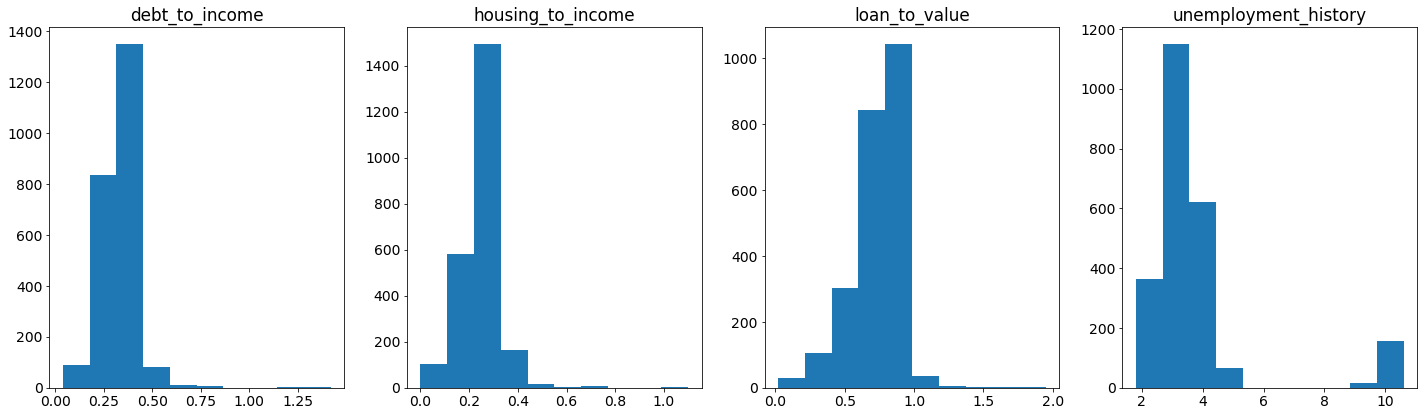

In [13]:
#create a smaller dataframe consisting of the numeric variables
loans_numeric = loans_new[['debt_to_income', 'housing_to_income', 'loan_to_value', 'unemployment_history']]

#plot a histogram for each of our numeric attributes

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,6)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
for k in loans_numeric :   #for each numerical column 
    plt.subplot(1,4,j) 
    plt.hist(loans_new[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

We see that debt_to_income and housing_to_income both appear to be somewhat normally distributed and centered somewhere around 0.3. The variable loan_to_value appears to be left skewed with a peak at close to one. We also see that unemployment_history seems to be clustered, with most of the data between 2 and 6 and then another cluster centered around 10. 

We will now look at our categorical variables (including our target variable) as bar plots which show percentages of the total.

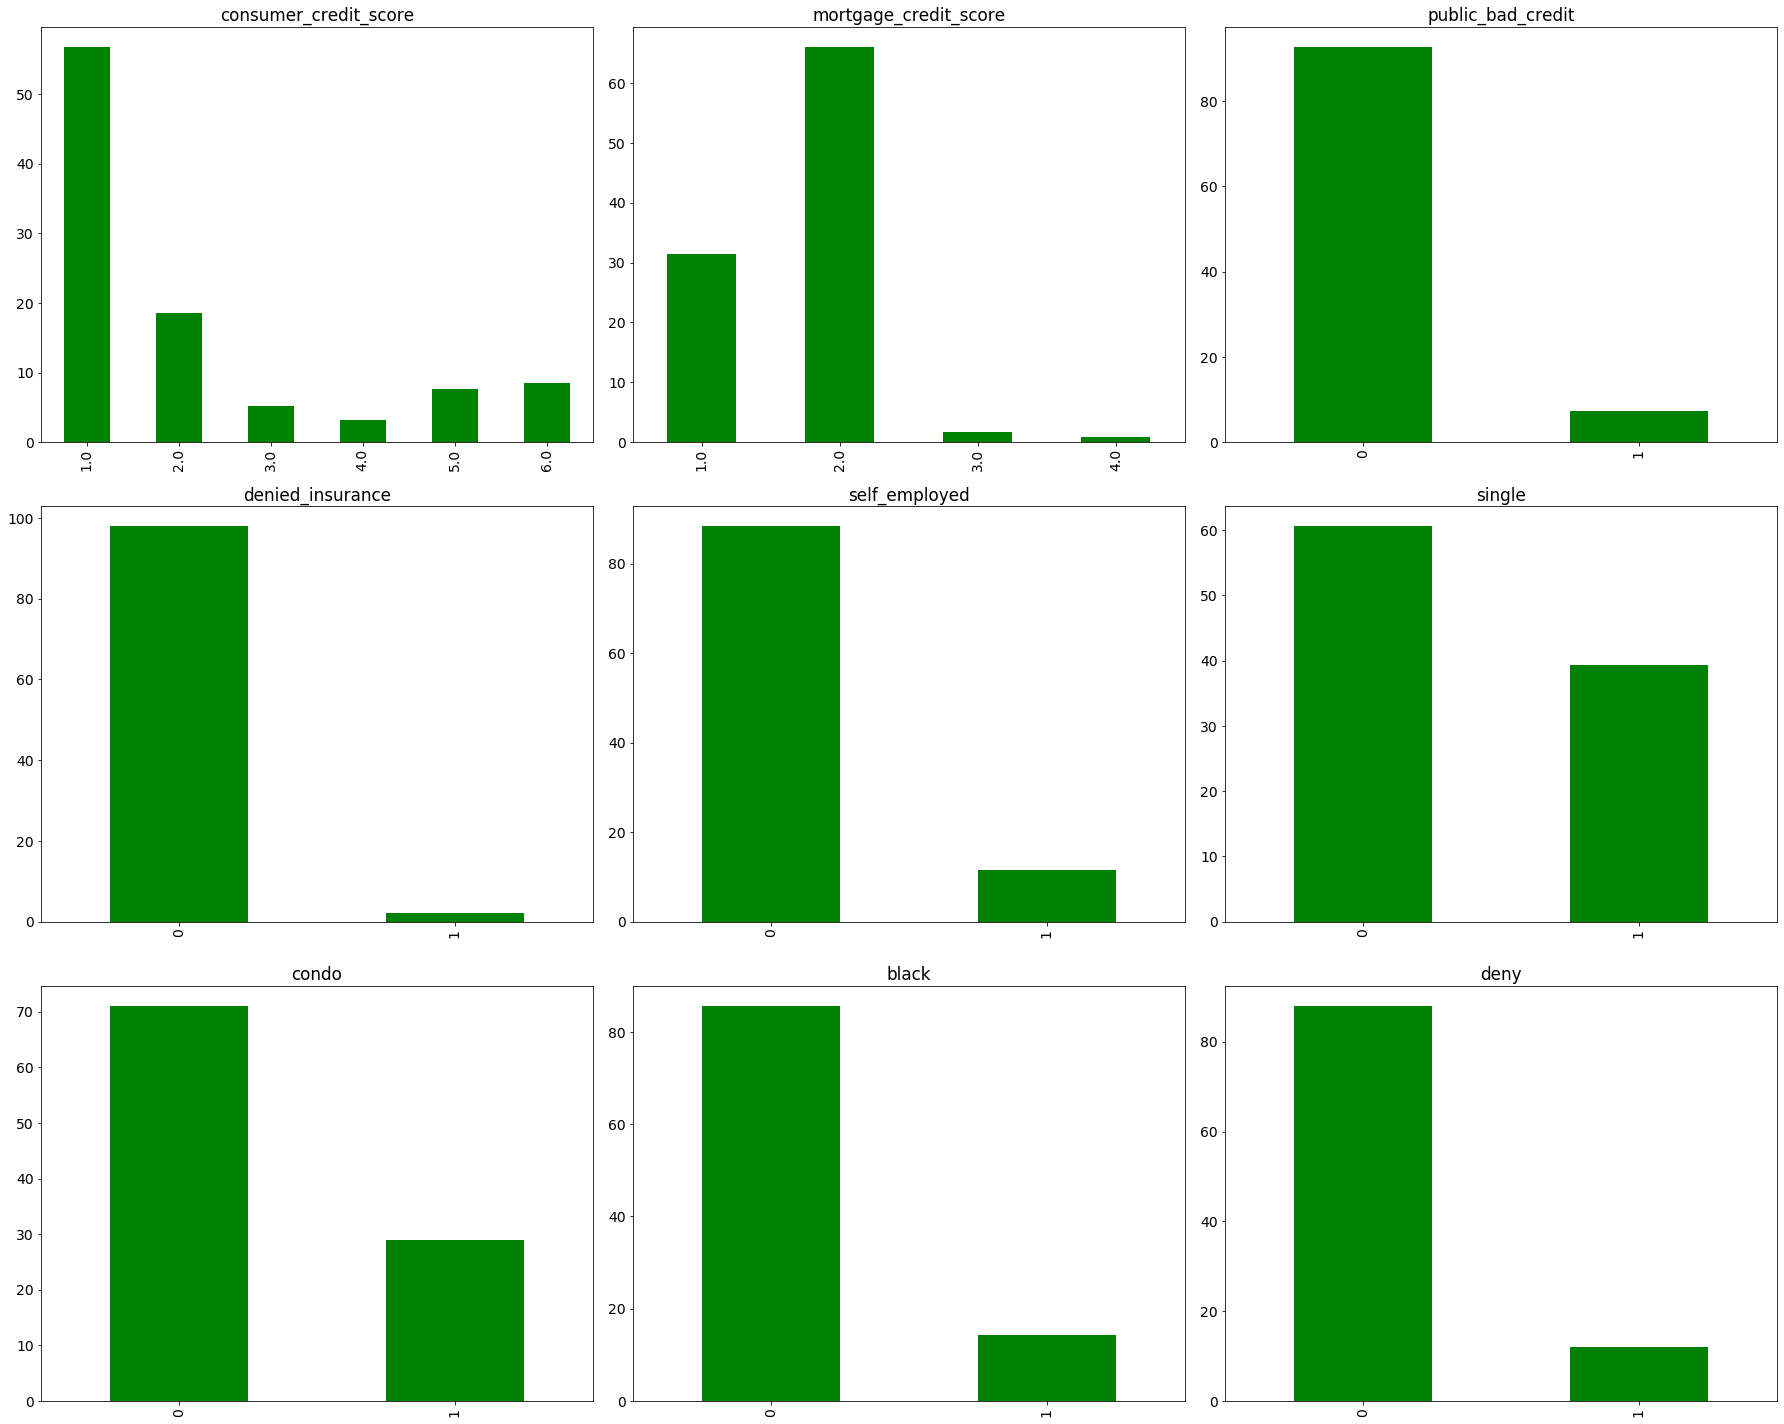

In [14]:
#create a smaller data frame consisting of our categorical attributes
loans_cat = loans_new[['consumer_credit_score','mortgage_credit_score','public_bad_credit', 
                       'denied_insurance','self_employed','single','condo','black','deny']]

#plot a bar chart for each of our categorical attributes as % of total 

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(25,20)}) 

#use an index to identify the spot of the subplot
j=1

for k in loans_cat :   #for each categorical column 
    plt.subplot(3,3,j) 
    ((loans_new[k].value_counts()/len(loans_new[k]))*100).sort_index().plot(kind='bar', color='green');
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the above bar charts we note the following:
- over 50% of applicants had a good consumer credit score
- the majority (over 90%) of applicants had a mortgage credit score that was 2 or better
- over 80% of applicants did not have a public record of bad credit
- almost 100% of applicants were not denied insurance
- over 80% of applicants were not self employed; this is not surprising as most Americans work for companies
- around 60% of applicants were not single, with 40% of applicants being single
- the majority (almost 70%) of applicants were not applying for a mortgage for a condominium
- less than 20% of applicants were black
- less than 20% of applicants had their application denied

Now we will plot boxplots of the distribution of each numerical variable against the target variable (deny), to see if any of them would be clear predictors of the target.

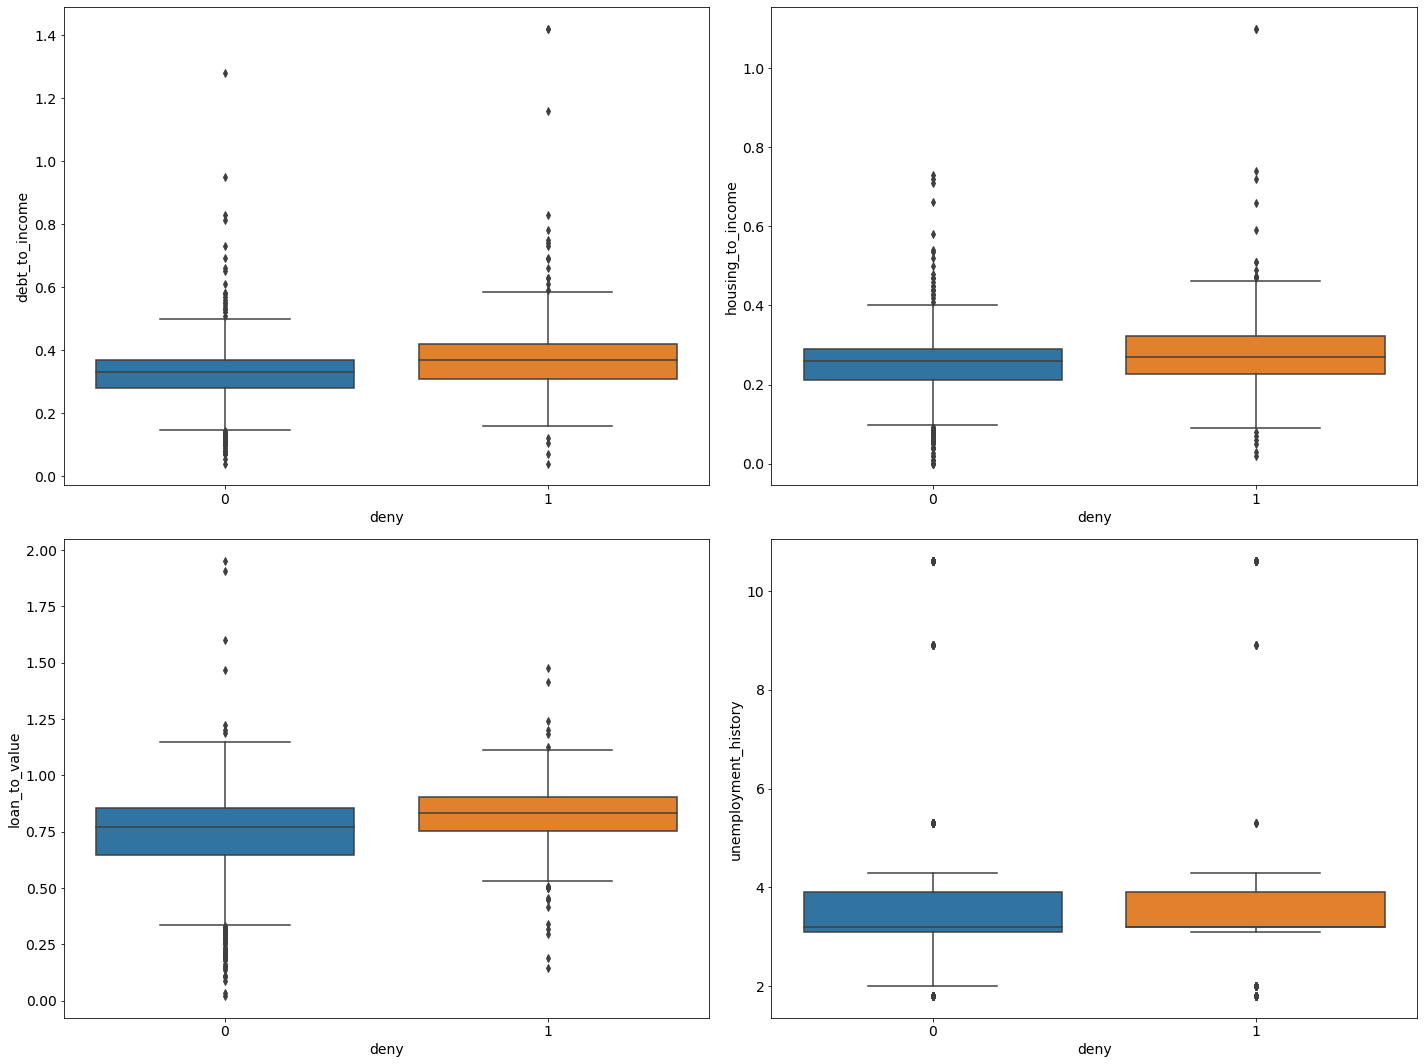

In [15]:
#plot boxplots of the distribution of each numerical variable against the target variable (deny)

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,15)}) 

#use an index to identify the spot of the subplot
j=1
for k in loans_numeric.columns.to_list():   #for each numerical variable 
    plt.subplot(2,2,j) 
    sns.boxplot(data=loans_new, x='deny', y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

Looking at the boxplots, the distribution in both classes of the target is very similar in all the numerical variables. Therfore, we can't confidently say any of them will be clear predictors of the target. 

We also note the presence of outliers in both classes of the target, in all the numerical variables. Next, we will look at boxplots of each numerical variable and check how many outliers we have.

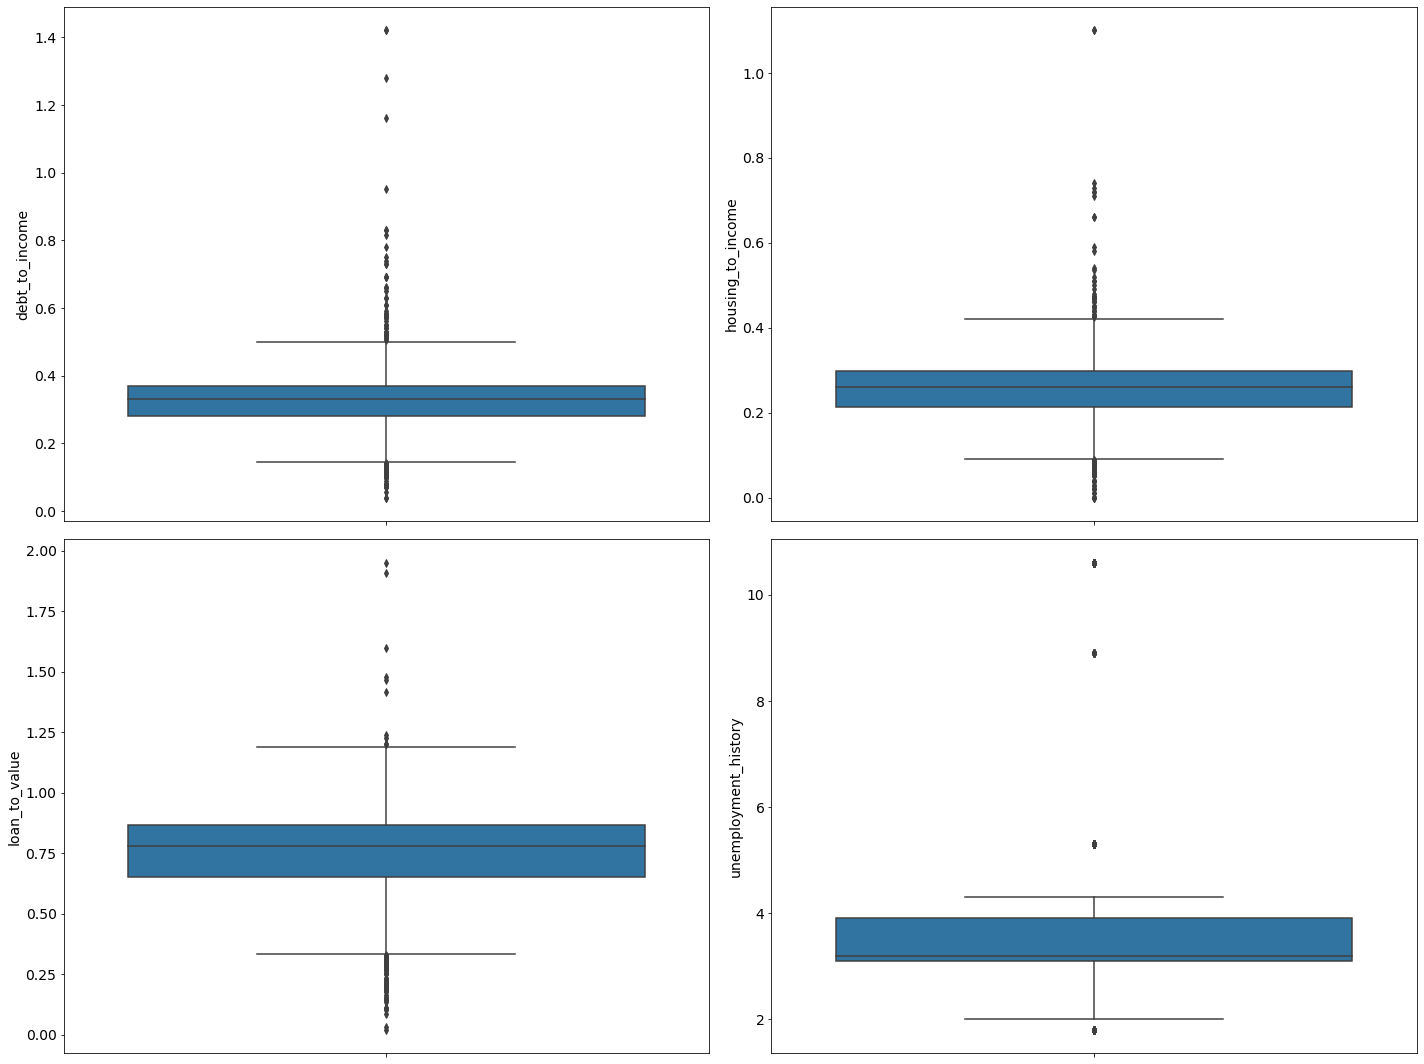

In [16]:
#plot boxplots of the distribution of each numerical variable

# set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,15)}) 

#use an index to identify the spot of the subplot
j=1
for k in loans_numeric.columns.to_list():   #for each numerical variable 
    plt.subplot(2,2,j) 
    sns.boxplot(data=loans_new, y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

In [17]:
#cont number of outliers per column
columns = loans_numeric.columns.tolist()
new_df = loans_numeric.copy()  #create a copy of our data frame
print('Current Shape of dataset:',loans_numeric.shape)  #show shape of dataframe before

#use a for loop to iterate through the columns and count outliers
for k in columns:
    IQ3 = new_df[k].quantile(0.75)
    IQ1 = new_df[k].quantile(0.25)
    IQR = (IQ3-IQ1)*1.5
    print('Number of outliers for variable "%s" is:' %k, new_df.shape[0]-new_df[((new_df[k]>=(IQ1-IQR)) & (new_df[k]<=(IQ3+IQR)))].shape[0])

Current Shape of dataset: (2374, 4)
Number of outliers for variable "debt_to_income" is: 95
Number of outliers for variable "housing_to_income" is: 94
Number of outliers for variable "loan_to_value" is: 91
Number of outliers for variable "unemployment_history" is: 456


The variable with the most outliers is 'unemployment_history', which represent 19% of the data. In the other three variables, the outliers represent around 4% of the data. 

Since we have already discarded data we belived to be invalid, we decided not to discard any further observations. We also do not wish to discard these observations to avoid possible overfitting. 

Next we will look at a correlation heat map between our numerical variables and the target variable, to check for collinearity and see if there are any variables which are strongly correlated with the target variable (deny). 

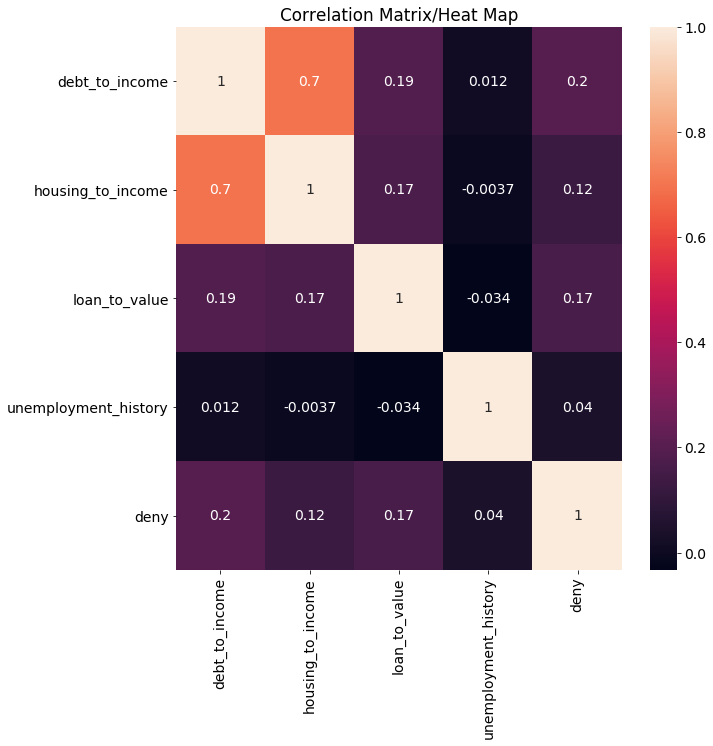

In [18]:
#get correlation matrix and plot it using seaborn

#set figure size
plt.figure(figsize=(10, 10)) 

#create a df with loans_numeric + target variables
corr_dataset = loans_numeric.copy()
corr_dataset['deny'] = loans_new.deny

#get correlation matrix
corrMatrix = corr_dataset.corr() 
#graph correlation matrix
sns.heatmap(corrMatrix, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Looking at our correlation heat map, there are no variables with strong correlations (defined here as greater than 0.75 or less than -0.75). The variables debt_to_income and housing_to_income do have a moderately strong correlation of .7.  Based on our domain knowledge, we believe that housing debt is part of the debt_to_income variable. Therefore we will only use debt_to_income, which also has a higher correlation with our target variable, in our model. 


Next, we will perform a Chi-square test of independence between the target variable and our categorical variables (binary and integer).

In [19]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
chi_sq=[]
var_name = loans_cat.columns.tolist()
for i in range(0,8):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(loans_cat.deny, loans_cat.iloc[:,:-1].iloc[:,i]))[0:2],var_name[i]])
#chi_sq
chi_sq.sort(reverse=True)

chi_sq_df = pd.DataFrame(chi_sq,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df

,"Chi_Sq_Value , P_value",Variable
0,"(289.02068330399754, 8.127215619375593e-65)",denied_insurance
1,"(177.10124485217727, 2.0814405756672296e-40)",public_bad_credit
2,"(167.57666441048235, 2.3992758396214523e-34)",consumer_credit_score
3,"(99.462369342911, 1.999262525708676e-23)",black
4,"(28.50344542647948, 2.847406808975906e-06)",mortgage_credit_score
5,"(14.17214534433454, 0.00016682191356615637)",single
6,"(5.252860192454909, 0.021910726999450347)",self_employed
7,"(3.677216393818711, 0.055160868913777306)",condo


From our chi square test, the following columns should be the most significant columns to include in our analysis:  

- denied_insurance
- public_bad_credit
- consumer_credit_score
- black

The p-values associated with each chi square value are all statistically significant except for the chi_square value associated with the variable condo.

Based on our domain knowledge, there is a relationship between consumer_credit_score and public_bad_credit since both  are metrics to evaluate credit score. We will perform a Chi-square test of independence between them to decide whether we should include them both. 

In [20]:
#chi_sq independence test between consumer_credit_score and public_bad_credit
stats.chi2_contingency(pd.crosstab(loans_cat.consumer_credit_score, loans_cat.public_bad_credit))[0:2]

(254.02264287459434, 7.532345713793848e-53)

We see that consumer_credit_score and public_bad_credit are not independent, and to avoid collinearity in our model we will only use one of them. Since public_bad_credit has a higher chi_sq value with the target variable we will only use it.

## Model Creation 

We will now determine which combination of the predictor columns that we select below yield the model with the best results. To accomplish this we will create three different models and compare results.

First we will split the data into test and train sets. We will then calculate the null error rate to have a baseline accuracy. Next, we will train the models, describe our findings, and then evaluate the models and compare them to prior models as applicable.

Finally, we will pick the best model for our datset, test it on our test sample, and offer conclusions.

### Model 1 - Correlation Threshold

For this model we look at the variables debt_to_income, denied_insurance, public_bad_credit and black as these are the variables which had the strongest correlation and highest Chi_sq values with the target variable, respectively. Note that we left off consumer_credit_score for the reasons listed above.

In [21]:
# first we will define the predictor variables
predict = ['debt_to_income', 'denied_insurance', 'public_bad_credit', 'black']

# now we will create a subset of the data removing the response variable 
x = loans_new.loc[:, loans_new.columns != 'deny']

# create a subset that is only the deny variable since that's the response variable
y = loans_new['deny'].values

In [22]:
# load train_test_split, Logistic Regression and metrics from scikit learn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#create training and testing variables, use 80% of the data to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
#calculate proportion of applicants who were denied a loan
y_train.sum() / y_train.shape[0]

0.11848341232227488

In [24]:
from sklearn.metrics import confusion_matrix
#create a confusion matrix for a naive model always predicting 0
confusion_matrix(y_train,np.zeros(y_train.shape[0]))

array([[1674,    0],
       [ 225,    0]], dtype=int64)

We see that the percentage of applicants in our training set who were denied a loan is **11.8%**. This means that we could achieve a model accuracy of (1-.118) = 0.882 or **88.2%** by simply predicting 0 or "was not denied a loan" for each applicant. Such a high accuracy for a terrible model clearly tells us that accuracy would not be the best metric by which to evaluate our models. 

It is reasonable to assume that the cost of not denying a loan to  a "bad" applicant is greater than dening a loan to a "good" applicant. Meaning, we should be minimizing the false-negative predictions we generate, and the metric we should be looking at and maximizing is Recall (TP/(TP+FN)). 

Although not as crucial, it is still important not to lose "good" applicants. Therefore, we will evaluate our models by looking at the F1 score as well. The F1 score is the harmonic mean between precision and recall and will therefore be useful to help us find a balance.

By predicting 0 or "was not denied a loan" for each applicant, our recall score would be:   
Recall=TP/(TP+FN)=0/(0+225) = 0.

Alternately we can predict 1 for all applicants. In which case, our recall score would be:  
Recall =TP/(TP+FN)=225/(225+0) = 1.  
However, our accuracy would be = 225/(225+1674) = 0.1184 or 11.8%.

Based on the above, we will be most interested in the recall and F1 scores to evaluate the performance of our models and compare results between models. We will also look at the AUC and accuracy, since we are attempting to achieve the best trade-off between all of these metrics.

We noted above in our EDA that the target variable is imbalanced, meaning that more than 80% of applicants in our dataset were NOT denied an application. However, we do not feel that we need to make an adjustment due to [this article](https://win-vector.com/2015/02/27/does-balancing-classes-improve-classifier-performance/) which explains that adjusting for an imbalanced class does not materially impact the performance of a logistic regression model.  
Additionally, [this article](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) states "reworking the problem itself is often the best way to tackle an imbalanced classes problem: the classifier and the decision rule have to be set with respect to a well chosen goal that can be, for example, minimizing a cost."

Now that we have checked our null error rate, and have decided upon the metrics of interest, we will create a sub-frame of the train set that only contains the columns we are interested in and train our first model using binary logistic regression.

In [25]:
#import stats model
import statsmodels.api as sm

#create our x to be used in the model based on the variables selected earlier
x1 = x_train[predict]

#add constant
x1 = sm.add_constant(x1)

#define the model type as logistic regression
results = sm.Logit(y_train,x1).fit()

#print summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.285770
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1899
Model:                          Logit   Df Residuals:                     1894
Method:                           MLE   Df Model:                            4
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                  0.2147
Time:                        22:41:27   Log-Likelihood:                -542.68
converged:                       True   LL-Null:                       -691.03
Covariance Type:            nonrobust   LLR p-value:                 5.553e-63
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2591      0.332    -12.813      0.000      -4.911      -3.608
debt_to_

Now that we have the results of our model, we will get the accuracy, recall, AUC, and F1 cross-validated scores using k-fold cross validation. We will use five folds since our training set has 1899 observations, this will allow a sufficient sample size for training our model. 

In [26]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

model1 = LogisticRegression()

#use k-fold cross validation
cross_val_results_recall = cross_val_score(model1, x_train[predict], y_train, cv=5,scoring='recall')
cross_val_results_accuracy = cross_val_score(model1, x_train[predict], y_train, cv=5,scoring='accuracy')
cross_val_results_rocauc = cross_val_score(model1, x_train[predict], y_train, cv=5,scoring='roc_auc')
cross_val_results_f1 = cross_val_score(model1, x_train[predict], y_train, cv=5,scoring='f1')

#print results
print("The accuracy scores for each of the folds were: ", cross_val_results_accuracy)
print("The average accuracy score for the 5 folds was: ", np.mean(cross_val_results_accuracy))

print("The recall scores for each of the folds were: ", cross_val_results_recall)
print("The average recall score for the 5 folds was: ", np.mean(cross_val_results_recall))

print("The AUC scores for each of the folds were: ", cross_val_results_rocauc)
print("The average AUC score for the 5 folds was: ", np.mean(cross_val_results_rocauc))

print("The F1 scores for each of the folds were: ", cross_val_results_f1)
print("The average F1 score for the 5 folds was: ", np.mean(cross_val_results_f1))

The accuracy scores for each of the folds were:  [0.91315789 0.88421053 0.89736842 0.90263158 0.90237467]
The average accuracy score for the 5 folds was:  0.8999486182474655
The recall scores for each of the folds were:  [0.37777778 0.2        0.2        0.22222222 0.24444444]
The average recall score for the 5 folds was:  0.24888888888888885
The AUC scores for each of the folds were:  [0.81522388 0.81545605 0.77485904 0.73741294 0.74447771]
The average AUC score for the 5 folds was:  0.777485923675038
The F1 scores for each of the folds were:  [0.50746269 0.29032258 0.31578947 0.35087719 0.37288136]
The average F1 score for the 5 folds was:  0.3674666579622391


Our average accuracy score from our cross-validation was narrowly better than our null error rate. This indicates that our model does add value. We have a relatively high AUC score which is good since a 1 would be a perfect AUC score. Our recall and F1 scores are a little low so we hope that in future models we can improve upon these two metrics.

All of our coefficients have a p-value of less than .05 indicating they are all statistically significant.

In examining the coefficients we see that:
- **debt_to_income**: As the debt_to_income ratio increases, meaning the applicant has more debt, the likelihood of the applicant being denied a loan increases. In this model, debt_to_income has the highest magnitude meaning that it has the most influence on our model compared to the other variables.
- **denied_insurance**: If the applicant was denied insurance (i.e. a 1), the applicant was more likely to be denied a loan. In this model, denied_insurance has the second highest magnitude and therefore it is the second-most influential.
- **public__bad_credit**: If an applicant has a public bad credit record (i.e. a 1), the likelihood that an applicant was denied a loan increases. The magnitude of this coefficient is less than half that of the coefficients of denied_insurance and debt_to_income. This makes sense since based on our domain knowledge, banks will be less likely to grant a loan to consumers who have a high debt_to_income ratio or were denied insurance because it creates more risk for the bank. 
- **black**: If an applicant was black, the applicant was more likely to be denied a loan. Out of the variables we chose for this model, the magnitude of the coefficient for the variable black was the smallest, indicating that of these variables being black was the least important predictor. Even though the magnitude is the least, the p-value of the coefficient is still statistically significant, and could therefore indicate that there are discriminatory lending practices. If all of the other variables are the same, the odds of getting denied a loan if you are a black individual are 74% higher (2.91 = e^logodds; odds=p/(1-p); 2.91/3.91 = .074).

### Model 2 - Bidirectional Selection

For this model we will use bidirectional selection to select the important features.

We utilized code from [Towards Data Science](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b) for this section.

In [27]:
#define a function to perform bidirectional selection based on the code from Towards Data Science
def bidirectional_selection(data, target,SL_in=0.05,SL_out = 0.05):
    '''This function takes a dataset of explanatory variables and a target variable and performs bidirectional
    selection to return the best features for a binary logistic regression model.'''
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit(disp = False)
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.Logit(target, best_features_with_constant).fit(disp = False).pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [28]:
#drop the columns we previously indicated have relationships to avoid collinearity
x_train2 = x_train.drop(columns = ['housing_to_income', 'consumer_credit_score'])

#apply the function above to our dataset to get the variables we should use.
biselect_variables=bidirectional_selection(x_train2, y_train)

#print the variables selected by bidirectional selection
print(biselect_variables)

['public_bad_credit', 'denied_insurance', 'black', 'debt_to_income', 'single', 'mortgage_credit_score', 'self_employed', 'loan_to_value']


In [29]:
#fit the logistic regression model with our data
x2 = x_train2[biselect_variables]

#add constant
x2 = sm.add_constant(x2)

#define the model type as logistic regression
results2 = sm.Logit(y_train,x2).fit()

#print summary
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.275090
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1899
Model:                          Logit   Df Residuals:                     1890
Method:                           MLE   Df Model:                            8
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                  0.2440
Time:                        22:41:28   Log-Likelihood:                -522.40
converged:                       True   LL-Null:                       -691.03
Covariance Type:            nonrobust   LLR p-value:                 4.708e-68
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.5202      0.592    -11.007      0.000      -7.681      -5.

Now that we have the results of our model, we will get the accuracy, recall, AUC, and F1 cross-validated scores using k-fold cross validation. We will use five folds since our training set has 1899 observations, this will allow a sufficient sample size for training our model. 

In [30]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

model2 = LogisticRegression()

#use k-fold cross validation
cross_val_results2_recall = cross_val_score(model1, x_train2[biselect_variables], y_train, cv=5,scoring='recall')
cross_val_results2_accuracy = cross_val_score(model1, x_train2[biselect_variables], y_train, cv=5,scoring='accuracy')
cross_val_results2_rocauc = cross_val_score(model1, x_train2[biselect_variables], y_train, cv=5,scoring='roc_auc')
cross_val_results2_f1 = cross_val_score(model1, x_train2[biselect_variables], y_train, cv=5,scoring='f1')

#print results
print("The accuracy scores for each of the folds were: ", cross_val_results2_accuracy)
print("The average accuracy score for the 5 folds was: ", np.mean(cross_val_results2_accuracy))

print("The recall scores for each of the folds were: ", cross_val_results2_recall)
print("The average recall score for the 5 folds was: ", np.mean(cross_val_results2_recall))

print("The AUC scores for each of the folds were: ", cross_val_results2_rocauc)
print("The average AUC score for the 5 folds was: ", np.mean(cross_val_results2_rocauc))

print("The F1 scores for each of the folds were: ", cross_val_results2_f1)
print("The average F1 score for the 5 folds was: ", np.mean(cross_val_results2_f1))

The accuracy scores for each of the folds were:  [0.91052632 0.88684211 0.9        0.90789474 0.90237467]
The average accuracy score for the 5 folds was:  0.9015275656158867
The recall scores for each of the folds were:  [0.33333333 0.17777778 0.22222222 0.26666667 0.24444444]
The average recall score for the 5 folds was:  0.24888888888888888
The AUC scores for each of the folds were:  [0.85625207 0.79893864 0.8227529  0.746733   0.75635396]
The average AUC score for the 5 folds was:  0.7962061151329183
The F1 scores for each of the folds were:  [0.46875    0.27118644 0.34482759 0.40677966 0.37288136]
The average F1 score for the 5 folds was:  0.3728850087668031


Our cross validated accuracy score for this model is slightly higher than our null error rate. Our recall is the same. The F1 score and AUC score are slightly higher. 

All of our coefficients have a p-value of less than .05 indicating they are all statistically significant.

Examining our coefficients we see the following:
- **public_bad_credit**: If a person has a public bad credit record, they are more likely to be denied a loan. The magnitude of this coefficient slightly decreased from the first model, which is as expected since we added more variables to the model. 
- **denied_insurance**: If a person was denied mortgage insurance, they are more likely to be denied a loan. The magnitude of this coefficient is the highest out of all the variables in this model, indicating it is the most important predictor for this model.
- **black**: If a person is black, they are more likely to be denied a loan. The magnitude of this coefficient decreased from the first model, which is again not surprising as we have added more variables. Additionally, the magnitude of the coefficient of this variable is no longer the lowest of the variables present. As in our first model, we see that it is likely that there are discriminatory practices in lending.
- **debt_to_income**: If a person has a high debt to income ratio, meaning their debt is a high portion to their income, they are more likely to be denied a loan. This is not surprising as banks will not like to risk non-repayment. Unlike the first model, in this model, debt_to_income does not have the highest magnitude and is now the second-most important predictor. 
- **single**: People who are single are more likely to be denied a loan. This could be because banks prefer to mitigate the risk of non-payment so if there are multiple people on the loan, they have a higher likelihood of being paid if something happens to one of the individuals.  The magnitude of this coefficient tells us that it is even less important than being black.
- **mortgage_credit_score**: The higher the mortgage_credit_score, the more likely an applicant is to be denied a loan. In the context of this dataset, a low credit score is most desirable (meaning 1 is the best), therefore this result is not surprising. The magnitude of this coefficient is the lowest of the variables in this model indicating that it is the least important predictor present.
- **self_employed**: If a person is self employed, they are more likely to be denied a loan. This is also not surprising since people who are self employed tend to have a less reliable income than people who are employed by a company. The magnitude of this coefficient indicates that this is a more important predictor than being single, or having a bad mortgage_credit_score.
- **loan_to_value**: If an applicant has a higher loan to house value ratio, they are more likely to be denied a loan. Again, this is not surprising since we know that banks prefer to have larger downpayments (i.e. a lower loan_to_value ratio). The magnitude of this coefficient indicates that this predictor is more important than being single, self-employed, having a bad mortgage_credit_score, or being black.

### Model 3 - Backward Elimination

Next we will apply backward elimination to our dataset to determine which features are important.

In [31]:
#create a function that will tell us which variables have a p-value less than .05.
def backward_elimination(data, target,significance_level = 0.05):
    '''takes the explanatory variables and target variables and uses backward selection to determine
    which variables have a p-value of less than .05'''
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.Logit(target, features_with_constant).fit(disp = False).pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [32]:
#apply the function above to our dataset to get the variables we should use.
backward_select_variables=backward_elimination(x_train2, y_train)

#print the variables selected by bidirectional selection
backward_select_variables

['debt_to_income',
 'loan_to_value',
 'mortgage_credit_score',
 'public_bad_credit',
 'denied_insurance',
 'self_employed',
 'single',
 'black']

Since our backward selection method yielded the same variables as our bidirectional selection method, we will use a different approach.

Based on our domain knowledge (reference available in our domain knowledge section above), we know that banks prefer to lend to individuals with a debt_to_income ratio of 0.43 or less. Therefore we believe that individuals with a debt_to_income ratio higher than .43 will be more likely to be denied a loan. We will now create an indicator variable as a new column to see if this influences the results of our model. 

In [33]:
#drop the columns we previously indicated have relationships to avoid collinearity
#exclude debt_to_income since it will duplicate data present in our indicator variable
x_train3 = x_train.drop(columns = ['housing_to_income', 'consumer_credit_score', 'debt_to_income'])
list_debt=[]
for i in x_train['debt_to_income']:
    if i>0.43:
        list_debt.append(1)
    else:
        list_debt.append(0)
x_train3['debt_indicator']=list_debt

#apply the function above to our dataset to get the variables we should use.
backward_select_variables2 = backward_elimination(x_train3, y_train)

#print the variables selected by bidirectional selection
backward_select_variables2

['loan_to_value',
 'mortgage_credit_score',
 'public_bad_credit',
 'denied_insurance',
 'self_employed',
 'single',
 'black',
 'debt_indicator']

In [34]:
#fit the logistic regression model with our data

# first we will define the predictor variables
x3 = x_train3[backward_select_variables2]

#add constant
x3 = sm.add_constant(x3)

#define the model type as logistic regression
results3 = sm.Logit(y_train,x3).fit()

#print summary
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.268004
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1899
Model:                          Logit   Df Residuals:                     1890
Method:                           MLE   Df Model:                            8
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                  0.2635
Time:                        22:41:29   Log-Likelihood:                -508.94
converged:                       True   LL-Null:                       -691.03
Covariance Type:            nonrobust   LLR p-value:                 8.484e-74
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.6035      0.513    -10.915      0.000      -6.610      -4.

Now that we have the results of our model, we will get the accuracy, recall, AUC, and F1 cross-validated scores using k-fold cross validation. We will use five folds since our training set has 1899 observations, this will allow a sufficient sample size for training our model. 

In [35]:
#define model type
model3 = LogisticRegression()

#use k-fold cross validation
cross_val_results3_accuracy = cross_val_score(model3, x3, y_train, cv=5,scoring='accuracy')
cross_val_results3_recall = cross_val_score(model3, x3, y_train, cv=5,scoring='recall')
cross_val_results3_rocauc = cross_val_score(model3, x3, y_train, cv=5,scoring='roc_auc')
cross_val_results3_f1 = cross_val_score(model3, x3, y_train, cv=5, scoring='f1')

#print results
print("The accuracy scores for each of the folds were: ", cross_val_results3_accuracy)
print("The average accuracy score for the 5 folds was: ", np.mean(cross_val_results3_accuracy))

print("The recall scores for each of the folds were: ", cross_val_results3_recall)
print("The average recall score for the 5 folds was: ", np.mean(cross_val_results3_recall))

print("The AUC scores for each of the folds were: ", cross_val_results3_rocauc)
print("The average AUC score for the 5 folds was: ", np.mean(cross_val_results3_rocauc))

print("The F1 scores for each of the folds were: ", cross_val_results3_f1)
print("The average F1 score for the 5 folds was: ", np.mean(cross_val_results3_f1))

The accuracy scores for each of the folds were:  [0.92368421 0.88947368 0.90526316 0.90526316 0.90765172]
The average accuracy score for the 5 folds was:  0.9062671851131787
The recall scores for each of the folds were:  [0.4        0.2        0.28888889 0.26666667 0.26666667]
The average recall score for the 5 folds was:  0.28444444444444444
The AUC scores for each of the folds were:  [0.86752902 0.84464345 0.8238806  0.74411277 0.77541583]
The average AUC score for the 5 folds was:  0.8111163344951887
The F1 scores for each of the folds were:  [0.55384615 0.3        0.41935484 0.4        0.40677966]
The average F1 score for the 5 folds was:  0.41599613071455604


Our cross validated accuracy, recall, AUC score, and F1 score are the highest we have seen in any of our models so far.

All of our coefficients had a p-value of less than .05 which indicates that they are all statistically signficant.

Examining our coefficients we see the following:
- **loan_to_value**: If an applicant has a higher loan to house value ratio, they are more likely to be denied a loan. Again, this is not surprising for the reasons stated above. The magnitude of this coefficient is higher than it was in model 2, which is interesting as we did not add more variables, the only thing which changed was debt_to_income was replaced by our debt indicator. This means that by removing the debt_to_income ratio, the loan_to_value became more important.
- **mortgage_credit_score**: As a person's mortgage_credit_score gets worse, i.e. gets higher, the likelihood they are denied a loan increases. The magnitude of this coefficient is only slightly larger than the magnitude of the coefficient for the variable single.
- **public_bad_credit**: If a person has a public bad credit record, they are more likely to be denied a loan. The magnitude of the coefficient increased slightly from model 2 with the removal of debt to income.
- **denied_insurance**: If a person was denied mortgage insurance, they are more likely to be denied a loan. The magnitude of the coefficient for this variable is the highest amongst this set of variables indicating it is the most important predictor present.
- **self_employed**: If a person is self employed, they are more likely to be denied a loan. This is also not surprising since people who are self employed tend to have a less reliable income than people who are employed by a company. The magnitude of the coefficient of this variable is slightly higher than that of the variables single and mortgage_credit_score.
- **single**: People who are single are more likely to be denied a loan. This could be because banks prefer to mitigate the risk of non-payment so if there are multiple people on the loan, they have a higher likelihood of being paid if something happens to one of the individuals. The magnitude of the coefficient for this variable is the lowest of the variables present indicating that it is the least important predictor. 
- **black**: If a person is black, they are more likely to be denied a loan. The magnitude of the coefficient for this variable is greater than that of single, self-employed, and mortgage_credit score, indicating that there are likely some discriminatory practices occurring.
- **debt_indicator**: If a person has a debt_to_income ratio of higher than .43, then, as we suspected, the bank is more likely to deny them a loan. The magnitude of this coefficient is substantially lower than the magnitude of debt_to_income in prior models.

We note that the magnitude of all of the coefficients (other than debt_to_income, which was removed) has increased from our previous model. We believe this is due to us removing a lot of noise in the data and replacing it with a simple indicator of an undesirable debt_to_income ratio. 

## Model Comparisons & Conclusions

Now we will compare the results of our three models. We will create a dataframe of the accuracy, recall, AUC, and F1 scores.

In [36]:
#summary of comparison between models
summary_df = pd.DataFrame(np.array([[np.mean(cross_val_results_accuracy), np.mean(cross_val_results_recall), np.mean(cross_val_results_rocauc), np.mean(cross_val_results_f1)],
                                  [np.mean(cross_val_results2_accuracy), np.mean(cross_val_results2_recall), np.mean(cross_val_results2_rocauc), np.mean(cross_val_results2_f1)],
                                  [np.mean(cross_val_results3_accuracy), np.mean(cross_val_results3_recall), np.mean(cross_val_results3_rocauc), np.mean(cross_val_results3_f1)]]),
                   columns=['Accuracy', 'Recall','AUC', 'F1'],index=['Model1','Model2', 'Model3'])

#print results
summary_df

,Accuracy,Recall,AUC,F1
Model1,0.899949,0.248889,0.777486,0.367467
Model2,0.901528,0.248889,0.796206,0.372885
Model3,0.906267,0.284444,0.811116,0.415996


We note that the **Accuracy** of all of our models is better than the null error rate of 88.2%. 

The **Recall** scores of our first and second models were identical, and the recall score of our third model is the best of the three, and all are better than the recall score of the naive model (where we predict 0 for each applicant), which was 0. 

The **AUC** scores improve with each model, and are the best for the third model. 

The **F1** score for the third model is also the best. 

Based on the reasons above, we select **model 3** as the model to which we will apply our testing subset.

## Preferred Model Application & Performance

Now we will apply our testing subset to our third model and see if the results are as expected.

In [37]:
#create a copy of x_test
x_test1 = x_test.copy()

#create the indicator column in x_test1
list_debt2=[]
for i in x_test1['debt_to_income']:
    if i>0.43:
        list_debt2.append(1)
    else:
        list_debt2.append(0)
x_test1['debt_indicator']=list_debt2

#select the columns
x_test1 = x_test1[backward_select_variables2]

#add constant
x_test1 = sm.add_constant(x_test1)

#use our model to predict values from the test set
predictions = results3.predict(x_test1)

#check results
predictions

870     0.061220
479     0.049003
215     0.054354
794     0.534067
531     0.095237
          ...   
1132    0.045896
1883    0.451654
1072    0.016111
482     0.077344
6       0.076910
Length: 475, dtype: float64

In [38]:
#get confusion_matrix() from sklearn 
from sklearn.metrics import confusion_matrix

#create the confusion matrix
test_conf_mat = confusion_matrix(y_test, round(predictions))

#check results 
test_conf_mat

array([[410,   7],
       [ 41,  17]], dtype=int64)

In [39]:
#import functions from sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#apply accuracy function to the dataset 
test_accuracy = accuracy_score(y_test, round(predictions))
print("Accuracy is:%s" %test_accuracy)

#apply recall function to the dataset
test_sensitivity = recall_score(y_test, round(predictions))
print("Recall is:%s" %test_sensitivity)

#get the AUC
fprtest, tprtest, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1) #apply roc_curve() to get fpr, tpr
test_auc = metrics.auc(fprtest, tprtest) #print the AUC
print("The AUC is:", test_auc)

#apply F1 function to the dataset
test_F1_score = f1_score(y_test, round(predictions))
print("F1 Score is:%s" %test_F1_score)

Accuracy is:0.8989473684210526
Recall is:0.29310344827586204
The AUC is: 0.7787356321839081
F1 Score is:0.41463414634146345


In [40]:
#add the test values to our dataframe with the results for easy comparison
summary_df = summary_df.append(pd.Series({'Accuracy': test_accuracy, 'Recall': test_sensitivity, 'AUC': test_auc, 'F1': test_F1_score},name = 'Test'), ignore_index = False)

#print results
summary_df

,Accuracy,Recall,AUC,F1
Model1,0.899949,0.248889,0.777486,0.367467
Model2,0.901528,0.248889,0.796206,0.372885
Model3,0.906267,0.284444,0.811116,0.415996
Test,0.898947,0.293103,0.778736,0.414634


## Conclusions

Our preferred model had a better recall score on our test data than on our training data. It also had nearly the same F1 score. The preferred model had a lower AUC than we expected, and also had a lower accuracy than it did when applied to our training data. However, the accuracy is still above the null error rate. 

It is promising that our test data yielded a higher recall score, and an F1 score that was only very slightly lower, since these were the two metrics most of interest given the purpose of our model. 